In [1]:
import os
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from dog_images import DogImages
from image_classifier import ImageClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
picsize = 128
# Step 1: Get List of Dogs
lst = [x[0] for x in os.walk('../Images')]
lst_dogs = [a.replace('../Images/', '') for a in lst[1:]]
print(lst_dogs[0])

n02097474-Tibetan_terrier


In [3]:
# Step 2: Make the Images...
dog_images = DogImages(lst_dogs, picsize)
# dog_images.generate_img_files()
train_imgs = dog_images.load_images('train')
test_imgs = dog_images.load_images('test')
Xtest = test_imgs[0]
Ytest = test_imgs[1]
Xtrain = train_imgs[0]
Ytrain = train_imgs[1]
print(lst_dogs[-1])

n02096177-cairn


In [4]:
# Step 3: Initial Shuffle of Train & Test Sets
Xhold = Xtrain.copy()
Yhold = Ytrain.copy()
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtrain[i, :] = Xhold[n, :]
    Ytrain[i, :] = Yhold[n, :]

Xhold = Xtest
Yhold = Ytest
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtest[i, :] = Xhold[n, :]
    Ytest[i, :] = Yhold[n, :]
print('done')

done


In [5]:
def plot_learning(model):
    plt.plot(list(range(len(model.loss_function))),
             model.loss_function, color='y', label='Loss/Max Loss')
    plt.plot(list(range(len(model.train_accuracies))),
             (1/len(model.classes))*np.ones(len(model.train_accuracies)),
             linestyle='-', label='chance')
    plt.plot(list(range(len(model.train_accuracies))),
             model.train_accuracies, color='r', label='Training')
    plt.plot(list(range(len(model.val_accuracies))),
             model.val_accuracies, color='b', label='Validation')
    plt.ylabel('Probability')
    plt.xlabel('Epochs')
    plt.title('Accuracy & Loss')
    plt.ylim(ymax=1)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

In [6]:
def shuffle_function(X, y):
    Xhold = X.copy()
    Yhold = y.copy()
    new = np.array([i for i in range(Xhold.shape[0])])
    np.random.shuffle(new)
    for i, n in enumerate(new):
        X[i, :] = Xhold[n, :]
        y[i, :] = Yhold[n, :]
    return X, y

In [7]:
def plot_learning(model):
    plt.plot(list(range(len(model.loss_function))),
             model.loss_function, color='y', label='Loss/Max Loss')
    plt.plot(list(range(len(model.train_accuracies))),
             (1/len(model.classes))*np.ones(len(model.train_accuracies)),
             linestyle='-', label='chance')
    plt.plot(list(range(len(model.train_accuracies))),
             model.train_accuracies, color='r', label='Training')
    plt.plot(list(range(len(model.val_accuracies))),
             model.val_accuracies, color='b', label='Validation')
    plt.ylabel('Probability')
    plt.xlabel('Epochs')
    plt.title('Accuracy & Loss')
    plt.ylim(ymax=1)
    plt.ylim(ymin=0)
    plt.legend()
    plt.show()

In [8]:
N = 50

In [14]:
# need 0:1 to get 0... it's a weird numpy thing
# so for lst_dogs[N], go Yt...[:, N:N + 1] 
Ytrain_1 = np.zeros((Ytrain.shape[0],2))
Ytest_1 = np.zeros((Ytest.shape[0],2))

Ytrain_1[Ytrain[:,N]==1] = [1, 0]
Ytrain_1[Ytrain[:,N]==0] = [0, 1]

Ytest_1[Ytest[:,N]==1] = [1, 0]
Ytest_1[Ytest[:,N]==0] = [0, 1]

Ytrain_a = Ytrain_1[Ytrain_1[:,0] == 1]
Xtrain_a = Xtrain[Ytrain_1[:,0] == 1]
Ytrain_b = Ytrain_1[Ytrain_1[:,0] == 0][:3*Ytrain_a.shape[0]]
Xtrain_b = Xtrain[Ytrain_1[:,0] == 0][:3*Ytrain_a.shape[0]]

Ytrain_run = np.concatenate((Ytrain_a, Ytrain_b))
Xtrain_run = np.concatenate((Xtrain_a, Xtrain_b))

lst_dogs_1 = [lst_dogs[N][lst_dogs[N].index('-')+1:], 'Not Hot Dog']

Xtrain_run, Ytrain_run = shuffle_function(Xtrain_run, Ytrain_run)
print(lst_dogs_1)

['Labrador_retriever', 'Not Hot Dog']


Percent Complete: 12.9375% - Train Accuracy: 79.592% - Validation Accuracy: 75.000% - Loss Function: 61.6553

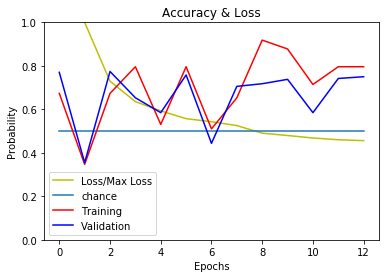

0.891451


In [16]:
model = ImageClassifier(picsize, lst_dogs_1,
                                 out_channels = 12,
                                 out_channels_2 = 24,
                                 hidden_units = 50,
                                 regularization_strength = 1.0,
                                 batch_size = 50,
                                 learning_rate = 0.0001,
                                 convolution_size = 5,
                                 pool_size = 2,
                                 training_epochs = 100,
                                 loss_threshold = 1.0,
                                 verbose=True)

model.fit(Xtrain_run, Ytrain_run)
plot_learning(model)
score = model.score(Xtest, Ytest_1)
print(score)

In [18]:
import tensorflow as tf

saver = tf.train.Saver()

save_path = saver.save(model.sess, "model.ckpt")
print("Model saved in file: %s" % save_path)

Model saved in file: model.ckpt


In [19]:
del model

In [26]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "model.ckpt")

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for model.ckpt
	 [[Node: save_4/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_4/Const_0, save_4/RestoreV2/tensor_names, save_4/RestoreV2/shape_and_slices)]]

Caused by op 'save_4/RestoreV2', defined at:
  File "/home/ubuntu/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ubuntu/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-26-1b8286e9d8e4>", line 1, in <module>
    saver = tf.train.Saver()
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1040, in __init__
    self.build()
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1070, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 675, in build
    restore_sequentially, reshape)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 402, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 242, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 668, in restore_v2
    dtypes=dtypes, name=name)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/ubuntu/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for model.ckpt
	 [[Node: save_4/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_4/Const_0, save_4/RestoreV2/tensor_names, save_4/RestoreV2/shape_and_slices)]]
